In [1]:
import itertools
import matplotlib.cm as cm
import heapq
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation

In [2]:
graph ={
'Delhi': {'Agra': 230, 'Jaipur': 280, 'Mumbai': 1400, 'Chennai': 2200, 'Kolkata': 1500, 'Hyderabad' : 1800 },
'Agra': {'Delhi': 230, 'Jaipur': 240, 'Mumbai': 1200, 'Chennai': 2000, 'Kolkata': 1300,'Hyderabad' : 2000},
'Jaipur': {'Delhi': 280, 'Agra': 240, 'Mumbai': 1150, 'Chennai': 1950, 'Kolkata': 1250,'Hyderabad' : 1000},
'Mumbai': {'Delhi': 1400, 'Agra': 1200, 'Jaipur' : 1150, 'Chennai': 1300, 'Kolkata': 2000,'Hyderabad' : 1700},
'Chennai': {'Delhi': 2200, 'Agra': 2000, 'Jaipur': 1950, 'Mumbai': 1300, 'Kolkata': 1700,'Hyderabad' : 1700},
'Kolkata': {'Delhi': 1500, 'Agra': 1300, 'Jaipur': 1250, 'Mumbai': 2000, 'Chennai': 1700,'Hyderabad' : 1700},
'Hyderabad': {'Delhi': 1600, 'Agra': 1400, 'Jaipur': 1350, 'Mumbai': 700, 'Chennai': 600,'Kolkata': 2000},
'Bangalore': {'Delhi': 2100, 'Agra': 1900, 'Jaipur': 1850, 'Mumbai': 1000, 'Chennai': 350,'Hyderabad' : 1700},
'Pune': {'Delhi': 1450, 'Agra': 1250, 'Jaipur': 1200, 'Mumbai': 150, 'Chennai': 1200, 'Kolkata' : 1800},
'Lucknow': {'Delhi': 500, 'Agra': 350, 'Jaipur': 400, 'Mumbai': 1400, 'Chennai': 2090, 'Kolkata' : 2000},
}

In [3]:
def heuristic(city_a,city_b):
    return graph[city_a].get(city_b,float('inf'))

def a_star(graph,start,goal):
    queue=[]
    heapq.heappush(queue,(0,start))
    g_scores={start:0}
    paths={start:None}
    while queue:
        __,current_node=heapq.heappop(queue)
        if current_node==goal:
            path=[]
            while current_node is not  None:
                path.append(current_node)
                current_node=paths[current_node]
            path.reverse()
            return path
        for neighbor in graph[current_node]:
            new_g_score=g_scores[current_node]+graph[current_node][neighbor]
            if neighbor not in g_scores or new_g_score < g_scores[neighbor]:
                g_scores[neighbor] = new_g_score
                h_score=heuristic(neighbor,goal)
                f_score=new_g_score + h_score
                
                heapq.heappush(queue,(f_score,neighbor))
                paths[neighbor]=current_node
    return None

In [4]:
def path_cost(graph,path):
    return sum(graph[path[i]][path[i+1]] for i in range (len(path)-1))

In [5]:
def find_all_paths(graph,start,end,path=[]):
    path=path+[start]
    if start==end:
        return [path]
    if start not in graph:
        return []
    paths=[]
    
    for node in graph[start]:
        if node not in path:
            newpaths=find_all_paths(graph,node,end,path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [6]:
all_paths=find_all_paths(graph,'Pune','Chennai')
for path in all_paths:
    print(path,'cost:',path_cost(graph,path))

['Pune', 'Delhi', 'Agra', 'Jaipur', 'Mumbai', 'Chennai'] cost: 4370
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Mumbai', 'Kolkata', 'Chennai'] cost: 6770
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Mumbai', 'Kolkata', 'Hyderabad', 'Chennai'] cost: 7370
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Mumbai', 'Hyderabad', 'Chennai'] cost: 5370
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Mumbai', 'Hyderabad', 'Kolkata', 'Chennai'] cost: 8470
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Chennai'] cost: 3870
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Kolkata', 'Mumbai', 'Chennai'] cost: 6470
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Kolkata', 'Mumbai', 'Hyderabad', 'Chennai'] cost: 7470
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Kolkata', 'Chennai'] cost: 4870
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Kolkata', 'Hyderabad', 'Mumbai', 'Chennai'] cost: 6870
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Kolkata', 'Hyderabad', 'Chennai'] cost: 5470
['Pune', 'Delhi', 'Agra', 'Jaipur', 'Hyderabad', 'Mumbai', 'Chennai'] cost: 4920
['Pune', 'Delhi', 'Agra', 'Jaipur',

In [7]:
optimal_path=a_star(graph,'Pune','Chennai')
print("Optimal")
print(optimal_path,"cost:",path_cost(graph,optimal_path))

Optimal
['Pune', 'Chennai'] cost: 1200


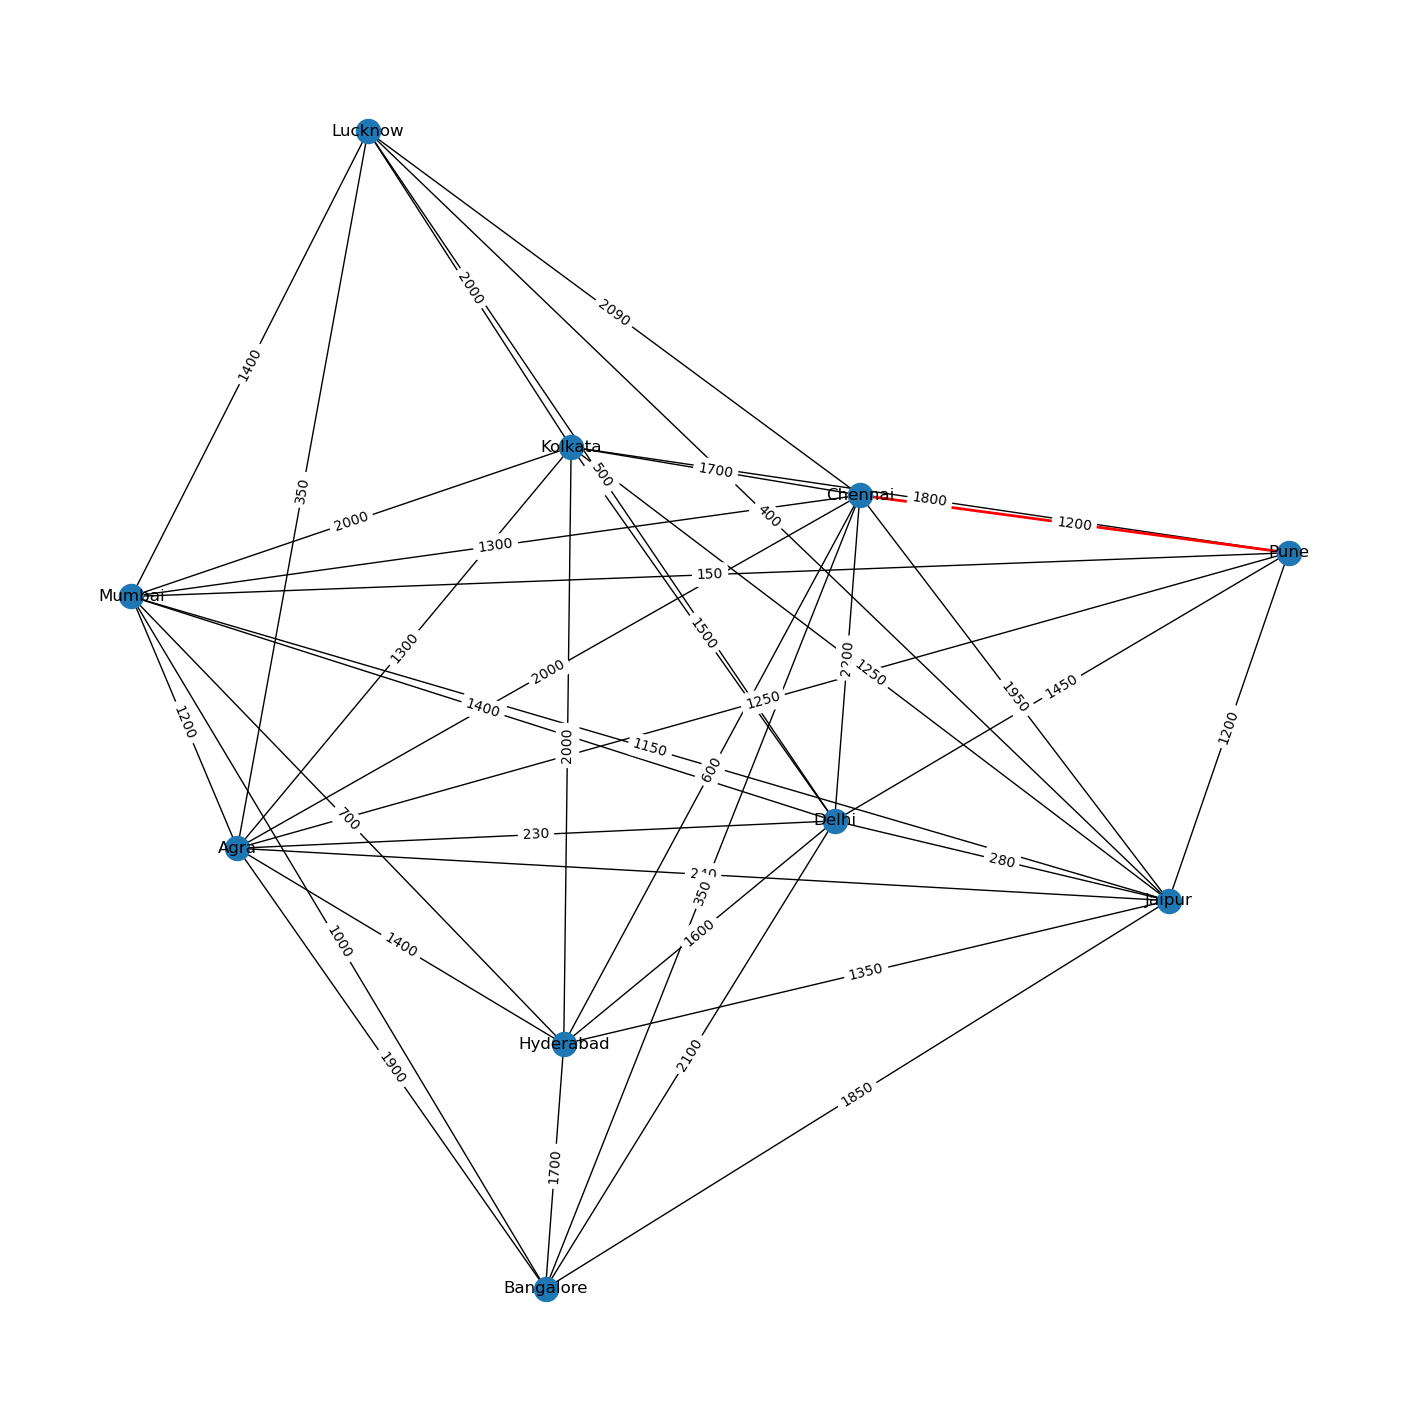

In [8]:
#Create a color map
colors=cm.rainbow (np.linspace(0, 1, len(graph)))
plt.figure(figsize=(14, 14))

#Create a graph

G = nx.Graph()

# Add edges to the graph

for city in graph:
    for neighbor in graph[city]:
        G.add_edge(city, neighbor, weight=graph[city][neighbor])

#Draw the graph

random_state = 42

# you can choose any number

pos = nx.spring_layout(G, seed=random_state) # positions for all nodes

# Color each city differently

for city in graph:
    for neighbor in graph[city]:
        G.add_edge(city, neighbor, weight=graph[city][neighbor])

#Draw the graph

nx.draw(G, pos, with_labels=True)

#Draw the optimal path

optimal_path_edges = [(optimal_path[i], optimal_path[i+1]) for i in range(len(optimal_path)-1)]

nx.draw_networkx_edges(G, pos, edgelist=optimal_path_edges, edge_color='r', width=2)

# Display the weights

labels=nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()